<a href="https://colab.research.google.com/github/Junnjjj/Algorithm/blob/master/NLP/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP 분석

0. Colab에 라이브러리 설치

In [3]:
# !pip install pykospacing
!pip install konlpy



#Google drive 
from google.colab import drive
drive.mount('/content/drive')

# #한글 폰트 
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 460kB 31.3MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Mounted at /content/drive




1. 라이브러리 로딩


In [4]:
import re
import os
import sys
import pandas as pd
import numpy as np
import tensorflow as tf
import json

# from pykospacing import spacing
from konlpy.tag import Kkma
from konlpy.tag import Okt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# import soynlp
import nltk

kkma = Kkma()
okt = Okt()
plt.rc('font', family='NanumBarunGothic') 

Json 파싱작업


In [9]:
path = '/content/drive/MyDrive/Colab Notebooks/nlp/txtTojson.txt'

#txt 파일 읽어서 ->  ,] 나오면 하나의 json 형식으로 만든다.

with open(path) as f:
    contents = f.read()

index = 0
count = 0
jsonList = []

print(len(contents))

while True:
  temp = contents[index:index+2]
  if temp == '],':
    jsonList.append(contents[count:index+1])
    count = index+2
  index +=1

  #break
  if len(contents) == index +1:
    break 

#jsonList 마다 json 형식으로 바꾸어서 저장 후 
jsonListSize = len(jsonList)
print(jsonListSize)

path = '/content/train_data/'

ReviewJson = []
for i in range(jsonListSize):
  ReviewJson.append(json.loads(jsonList[i]))

  #Train Data Json 형식으로 저장
  #content 에 train_data
  name = "t"+ str(i) + '.json'
  with open(path + name , 'w', encoding='utf-8') as make_file:
    json.dump(ReviewJson[i], make_file, indent="\t", ensure_ascii = False)

26723382
1163


In [34]:
################# 테스트 #################


#tokenize 함수
def tokenize(doc):
  #형태소와 품사를 join
  return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]




# # 파일 위치
# reviewjson_path = '/content/drive/MyDrive/Colab Notebooks/nlp/test.json'
firstPath = '/content/train_data/t0.json'

df = pd.read_json(firstPath)


#dataFrame Concatnation
#jsonListSize
for i in tqdm(range(1,jsonListSize), desc="Json Data 합치기"):
  jsonPath = '/content/train_data/t' + str(i) + '.json'
   
  dfTemp = pd.read_json(jsonPath)
  df = pd.concat([df,dfTemp], ignore_index=True)



# for i in tqdm(range(len(df)), desc="Tokenize 과정"):
#review list 로 변환
newData = []
for i in tqdm(range(1000), desc="Tokenize 과정"):
  newData.append([df.text[i], df.avgStar[i]])

#tokenize 과정
new_docs = [(tokenize(row[0]), row[1]) for row in tqdm(newData[:500])] #train
new_docs2 = [(tokenize(row[0]), row[1]) for row in tqdm(newData[500:])] #test


# print(new_docs)


################# 테스트 #################

2.전처리 과정

In [ ]:
#new_docs 저장

df = pd.DataFrame(new_docs) 
    
# saving the dataframe 
df.to_csv('new_docs_dataFrame.csv', encoding='utf-8-sig')  

토큰개수: 28912
28912
3269
[('하다/Verb', 932), ('./Punctuation', 810), ('이/Josa', 655), ('\r\n/Foreign', 561), ('도/Josa', 437), ('에/Josa', 415), ('받다/Verb', 396), ('은/Josa', 395), ('피부/Noun', 301), ('가/Josa', 294), ('있다/Adjective', 260), ('친절하다/Adjective', 253), ('해주다/Verb', 252), ('시술/Noun', 248), ('같다/Adjective', 247), ('는/Josa', 237), ('상담/Noun', 233), ('좋다/Adjective', 232), ('가다/Verb', 219), ('을/Josa', 197)]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_tex

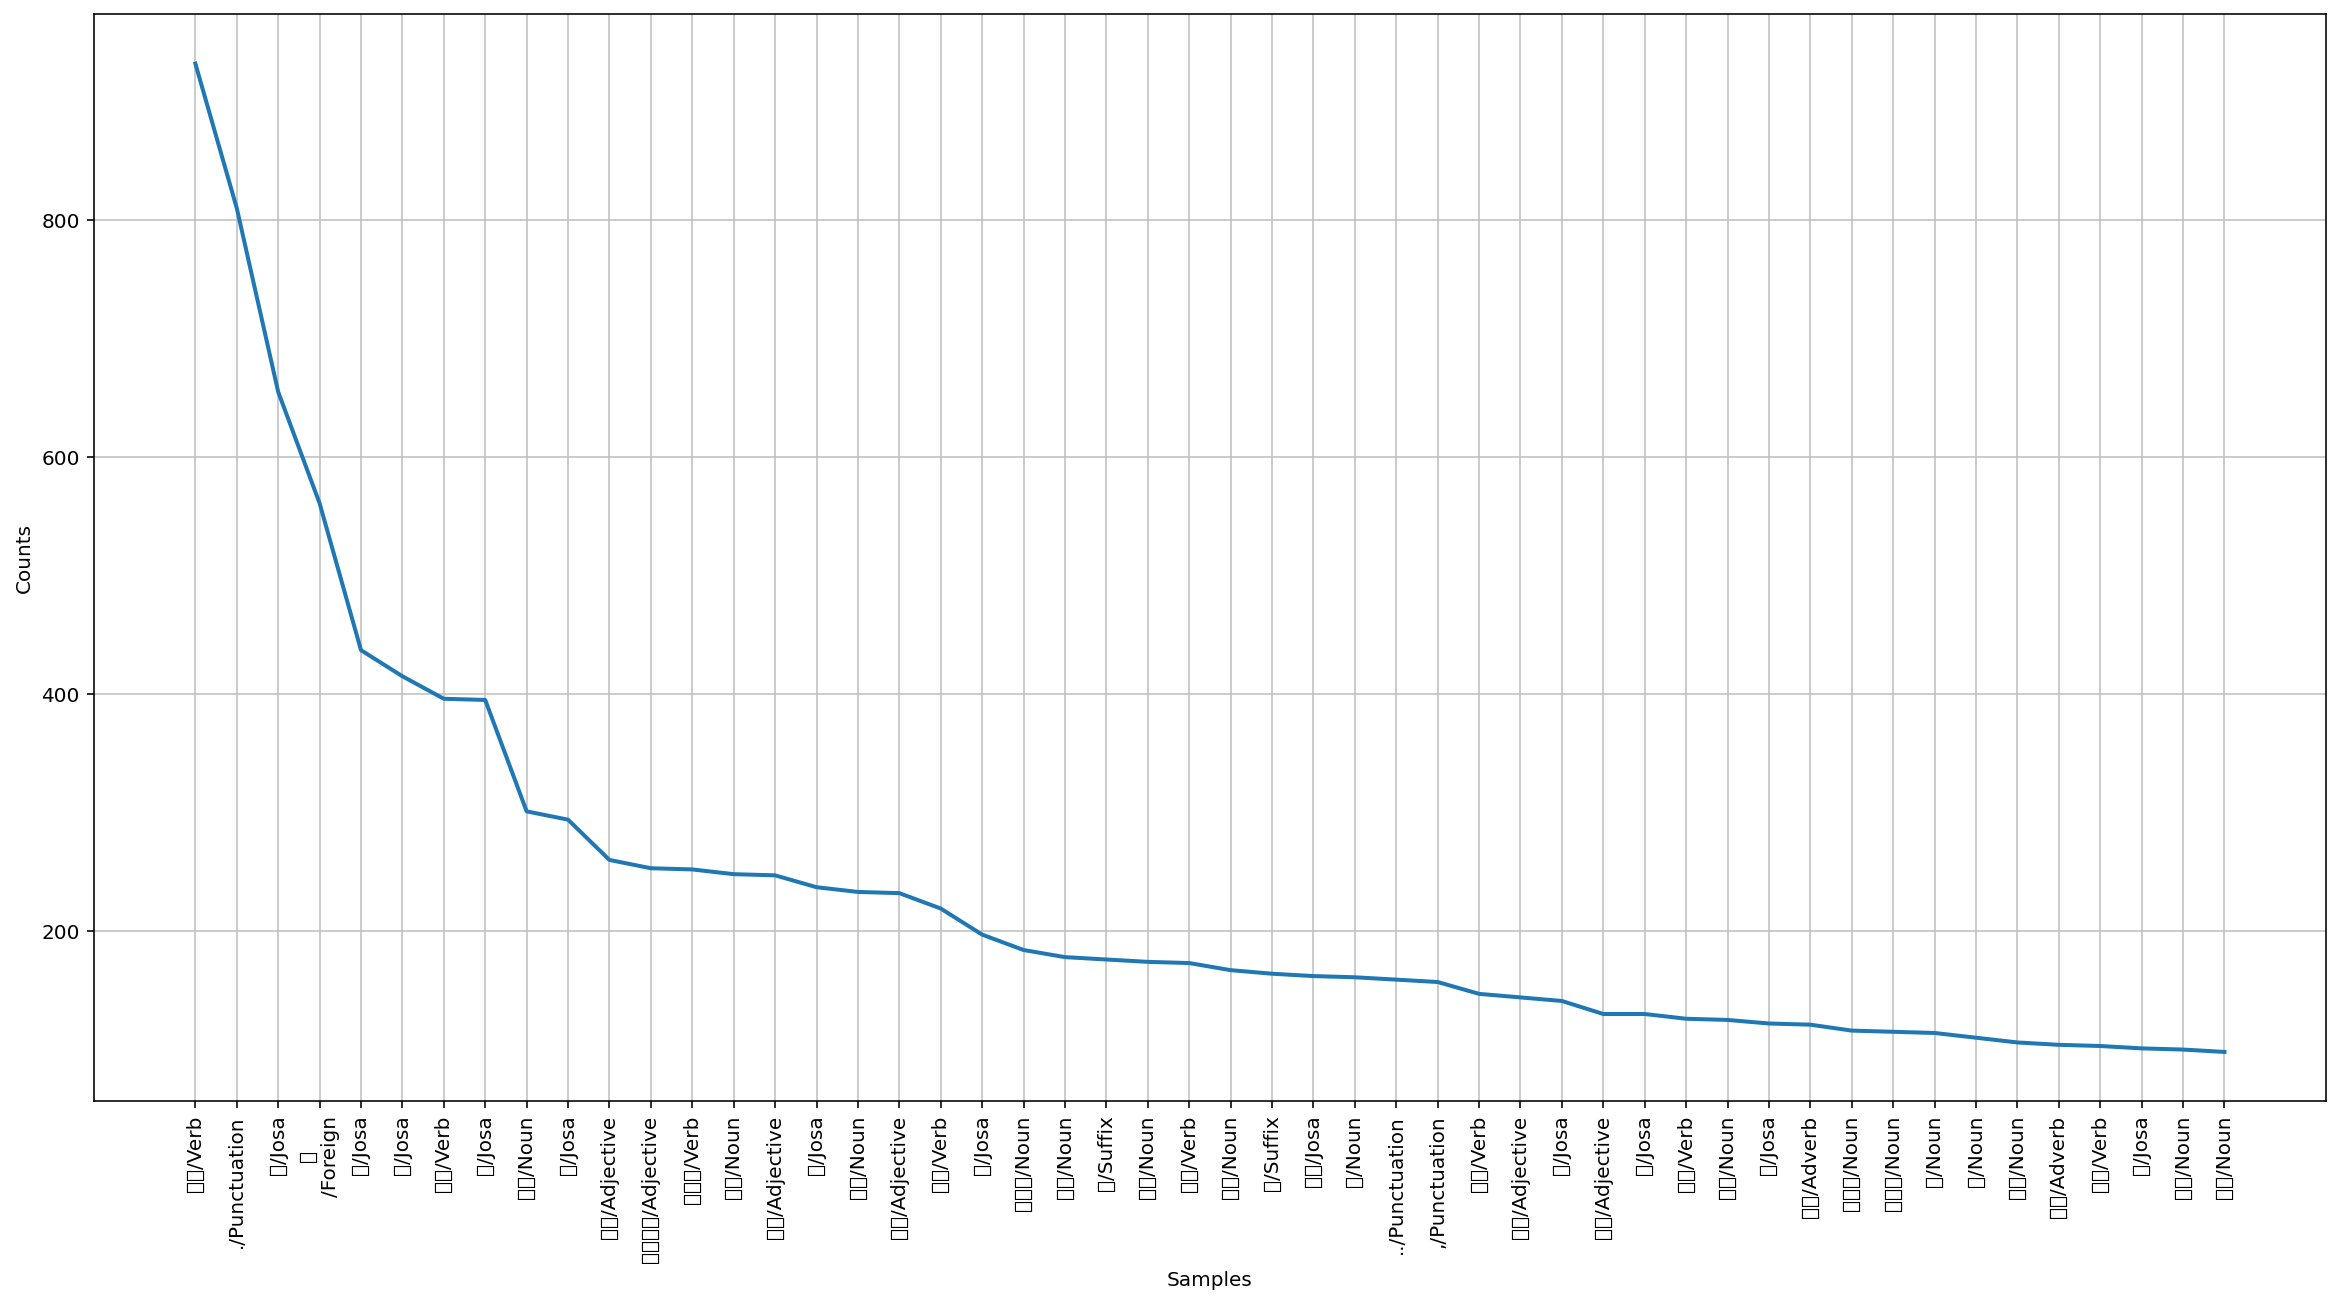

In [35]:
#토큰 구하기
tokens = [t for d in new_docs for t in d[0]]
print("토큰개수:", len(tokens))
# print(t okens)

#nltk 를 통한 전처리
text = nltk.Text(tokens, name='NMSC')

#토큰개수
print(len(text.tokens))

#중복을 제외한 토큰개수
print(len(set(text.tokens)))

#출력빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(20))

#명사 출력
# noun = []
# noun = [t for d in new_docs for t in d[0] if 'Noun' in t]

# test = nltk.Text(noun, name='NMSC')
# print(len(set(test.tokens)))
# print(test.vocab().most_common(20))


# print(noun)




#상위 토큰 10개 matpolib 으로 출력
plt.figure(figsize=(20,10))
text.plot(50)


MAML 적용

In [40]:
import torch
import torch.nn as nn
from collections import OrderedDict

In [41]:
# MLP 형태, 
#parameterised 는 원래의 모델은 건드리지 않고 업데이트 버젼의 weight를 사용하기 위한 모듈
#업데이트 버젼으로 로스를 구하고, 얻어진 로스로 원래 모델을 업데이트 할 것이다.

class MAML_Layer(nn.Module):
    def __init__(self, in_features, out_features):
        super(MAML_Layer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.fc = nn.Sequential(OrderedDict([
            ('l1', nn.Linear(in_features,10)),
            ('relu1', nn.ReLU()),
            ('l2', nn.Linear(10,10)),
            ('relu2', nn.ReLU()),
            ('l3', nn.Linear(10,out_features))
        ]))
        
    def forward(self, x):
        return self.fc(x)
    
    def parameterised(self, x, weights):
        x = nn.functional.linear(x, weights[0], weights[1])
        x = nn.functional.relu(x)
        x = nn.functional.linear(x, weights[2], weights[3])
        x = nn.functional.relu(x)
        x = nn.functional.linear(x, weights[4], weights[5])
        return x


In [45]:
# inner_loop
# 여러번의 업데이트로 얻어진 weight로 얻어진 로스를 얻기 위한 내부의 loop
# 업데이트를 몇 번 취할지는 자유로울 수 있으나 위의 구현에서는 1번만 수행하도록 제한

class MAML():    
    def __init__(self, 
                 model, 
                 train_tasks,
                 test_tasks,
                 inner_lr, 
                 meta_lr, 
                 K = 100,
                 inner_steps=1, 
                 tasks_per_meta_batch=1000):
        
        # important objects
        self.train_tasks = train_tasks
        self.test_tasks = test_tasks
        self.model = model
        # the maml weights we will be meta-optimising
        self.weights = list(model.parameters()) 
        
        self.criterion = nn.MSELoss()
        self.meta_optimiser = torch.optim.Adam(self.weights, meta_lr)
        
        # hyperparameters
        self.inner_lr = inner_lr
        self.meta_lr = meta_lr
        self.K = K
        self.inner_steps = inner_steps
        self.tasks_per_meta_batch = tasks_per_meta_batch 
        
        # metrics
        self.plot_every = 1
        self.print_every = 1
        self.train_losses = []
        self.test_losses = []
    
    def inner_loop(self, task):
        # reset inner model to current maml weights
        temp_weights = [w.clone() for w in self.weights]
        
        # perform training on data sampled from task
        X = torch.stack([b[0] for a in task for b in a])
        y = torch.stack([b[1] for a in task for b in a])
        for step in range(self.inner_steps):
            loss = self.criterion(self.model.parameterised(X, temp_weights), y) / len(y)
            
            # compute grad and update inner loop weights
            grad = torch.autograd.grad(loss, temp_weights)
            temp_weights = [w - self.inner_lr * g for w, g in zip(temp_weights, grad)]
        
        # sample new data for meta-update and compute loss
        loss = self.criterion(self.model.parameterised(X, temp_weights), y) / len(y)
        return loss
    
    def main_loop(self, num_iterations):
        epoch_loss = 0
        
        for iteration in range(1, num_iterations+1):
            
            # compute meta loss
            train_loss = 0
            test_loss = 0
            
            train = [i for i,_ in self.train_tasks]
            train_loss += self.inner_loop(train)
            
            test = [i for i,_ in self.test_tasks]
            test_loss += self.inner_loop(test)
            
            # compute meta gradient of loss with respect to maml weights
            meta_grads = torch.autograd.grad(train_loss, self.weights)
            
            # assign meta gradient to weights and take optimisation step
            for w, g in zip(self.weights, meta_grads):
                w.grad = g
            self.meta_optimiser.step()
            
            # log metrics
            if iteration % 10 == 1:
              print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(iteration, num_iterations, train_loss.item(), test_loss.item()))
              
            self.train_losses.append(train_loss.item())
            self.test_losses.append(test_loss.item())
            
        print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(iteration, num_iterations, train_loss.item(), test_loss.item()))
        

In [36]:
import random

#모델을 만들기 위해 벡터화
#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW(Bag of Words) 인코딩한 벡터를 만드는 역할
FREQUENCY_COUNT = 300;
selected_words = [f[0] for f in text.vocab().most_common(FREQUENCY_COUNT)]

# new_docs

# tasks = data.groupby('id').apply()

# tasks = new_docs

train_tasks = new_docs
test_tasks  = new_docs2

In [46]:
maml = MAML(MAML_Layer(30,1), train_tasks, test_tasks, inner_lr=0.01, meta_lr=0.001)
maml.main_loop(num_iterations=500)

TypeError: ignored

In [12]:
 
#모델을 만들기 위해 벡터화
#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW(Bag of Words) 인코딩한 벡터를 만드는 역할
FREQUENCY_COUNT = 300;
selected_words = [f[0] for f in text.vocab().most_common(FREQUENCY_COUNT)]

#단어리스트 문서에서 상위 1000개들중 포함되는 단어들이 개수
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]


x_new = [term_frequency(d) for d,_ in new_docs]
#라벨(1 or 0)
y_new = [c/100 for _,c in new_docs]

#float 형으로 형변환
x_new = np.asarray(x_new).astype('float32')
y_new = np.asarray(y_new).astype('float32')

#레이어 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



#학습 프로세스 설정
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.binary_accuracy]
    )

#학습 데이터로 학습
model.fit(x_new, y_new, epochs=10, batch_size=512)


results = model.evaluate(x_new, y_new)

results


#모델을 저장해둘수도 있다.
model.save('review_model.h5')




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7605 - binary_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6684 - binary_accuracy: 0.0400
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6373 - binary_accuracy: 0.0400
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6204 - binary_accuracy: 0.0400
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6096 - binary_accuracy: 0.0400
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6019 - binary_accuracy: 0.0400
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 0.5957 - binary_accuracy: 0.0400
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.5903 - binary_accuracy: 0.0400
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.5856 - binary_accuracy: 0.0400
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss

In [14]:

# 모델 불러오기
# from keras.models import load_model
# model = load_model('1106_model.h5')


def predict_review(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))

    if score > 0.5:
        print(f"{review} ==> 긍정 ({round(score*100)}%)")
    else:
        print(f"{review} ==> 부정 ({round((1-score)*100)}%)")


predict_review("유튜브에서 보던 느낌 그대로 상담 하세요 김태규 원장님. 그러나 자신만의 확고한 철학이 잇으셔서 그런지 타 병원 상담때와 대치되는 말을 몇개 하심 제 피부탄력이나 턱모양등... 결정적으로 후기사진이 하나 같이 몽달귀신 st 턱이어서 별로엿음")
predict_review('안면윤곽 상담받았어요 생각보다 병원에 사람이 많아요 김태규 원장님과 상담받았고 수술비용은 다른 병원에 바해서 조금 싼거같습니다. 원장님은 전문성 있어보였고 사람이 많아서 대기시간이 갈고 오래 기다린거 외엔 괜찮았습니다.')
predict_review('잘모르겠음 여러곳상담다녀봤는데 특별히다른거없는 그냥 완전평범한 성형외과임 근데 상담을 짧게함 대체 몇백들여서 얼굴만드는수술하는데 30분도안되는 상담받고서 어떻게하겠다는거임? 상담만받고 거른거같음 . . .')
predict_review('이 병원 너무 별로네요 왜이리 수술이라던지 여드름 치료가 별로인지 모르겠어오 어떻게 하겠다는거에요')
predict_review('후기보니까 눈 쪽 괜찮게 하시는 것 같아서 찾아갔어요. 상담도 친절하시고 나쁘지 않았는데 지금 수술 후 4주 차인데 붓기 빠질 기미가 안보이네요.')
predict_review('후기보니까 눈 쪽은 괜찮게 하시는 것 같아서 찾아갔어요. 상담도 친절하시고나쁘지 않았는데 전후 피드백이나 디테일한 부분른 별로네요 지금 수술 후 4주 차인데 붓기 빠질 기미도 안보이네요.')

유튜브에서 보던 느낌 그대로 상담 하세요 김태규 원장님. 그러나 자신만의 확고한 철학이 잇으셔서 그런지 타 병원 상담때와 대치되는 말을 몇개 하심 제 피부탄력이나 턱모양등... 결정적으로 후기사진이 하나 같이 몽달귀신 st 턱이어서 별로엿음 ==> 긍정 (63%)
안면윤곽 상담받았어요 생각보다 병원에 사람이 많아요 김태규 원장님과 상담받았고 수술비용은 다른 병원에 바해서 조금 싼거같습니다. 원장님은 전문성 있어보였고 사람이 많아서 대기시간이 갈고 오래 기다린거 외엔 괜찮았습니다. ==> 긍정 (68%)
잘모르겠음 여러곳상담다녀봤는데 특별히다른거없는 그냥 완전평범한 성형외과임 근데 상담을 짧게함 대체 몇백들여서 얼굴만드는수술하는데 30분도안되는 상담받고서 어떻게하겠다는거임? 상담만받고 거른거같음 . . . ==> 부정 (51%)
이 병원 너무 별로네요 왜이리 수술이라던지 여드름 치료가 별로인지 모르겠어오 어떻게 하겠다는거에요 ==> 긍정 (60%)
후기보니까 눈 쪽 괜찮게 하시는 것 같아서 찾아갔어요. 상담도 친절하시고 나쁘지 않았는데 지금 수술 후 4주 차인데 붓기 빠질 기미가 안보이네요. ==> 긍정 (60%)
후기보니까 눈 쪽은 괜찮게 하시는 것 같아서 찾아갔어요. 상담도 친절하시고나쁘지 않았는데 전후 피드백이나 디테일한 부분른 별로네요 지금 수술 후 4주 차인데 붓기 빠질 기미도 안보이네요. ==> 긍정 (63%)
